In [1]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sys
import numpy as np
import json
import time
import os
# User imports
from Misc import read_binary

In [2]:
os.chdir("../../../../../")
root = "data/full/"
train_root_path = f"{root}/prepared/train"
reference_data_root = f"data/full/data_bcgw/"
raw_data_root = f"{root}data_img/"

In [3]:
def get_run_logdir(root_logdir):
    import time
    run_id = time.strftime("run__%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [4]:
outdir = os.path.join(os.curdir,'outs')
if not os.path.exists(outdir):
    os.mkdir(outdir)
outdir = os.path.join(outdir, 'RandomForestBinary')
if not os.path.exists(outdir):
    os.mkdir(outdir)
outdir = os.path.join(outdir, 'KFoldSeeded')
if not os.path.exists(outdir):
    os.mkdir(outdir)
outdir = get_run_logdir(outdir)
os.mkdir(outdir)

In [5]:
datadir = "/home/brad/Projects/research/fuel-for-fire/outs/RandomForestBinary/KFold/Run2"

In [6]:
n_est = 250
TYPE = "WATER"
FALSE_THRESH = .02
TRUE_THRESH = .4

In [7]:
X = np.load(f'{train_root_path}/full-img.npy')
col, row, band, tmp = read_binary(f"{reference_data_root}/{TYPE}.bin", to_string=False)
ones = np.ones((col * row))
# encode the floating point values to 1 or 0
vals = np.sort(np.unique(tmp))
t = ones * vals[len(vals) - 1]
if TYPE == 'WATER':
    y = np.not_equal(tmp, t) 
else:
    y = np.logical_and(tmp, t)
y = y.reshape(row * col)
print(y.shape)

	samples 3402 lines 4835 bands 1
+r data/full/data_bcgw//WATER.bin
(16448670,)


In [8]:
sub_img_shape = (4835//5,3402)
fold_length = sub_img_shape[0] * sub_img_shape[1]

TRUE SAMPLES - 275323
FALSE SAMPLES - 2726427


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.0s finished


TRUE SAMPLES - 18358
FALSE SAMPLES - 2620378


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   46.0s finished


TRUE SAMPLES - 3755
FALSE SAMPLES - 2721226


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   47.3s finished


Skipping fold 4 - thresholds yield length zero


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    5.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   12.1s
[Parallel(n_jobs=16)]: Done 750 out of 750 | elapsed:   21.2s finished


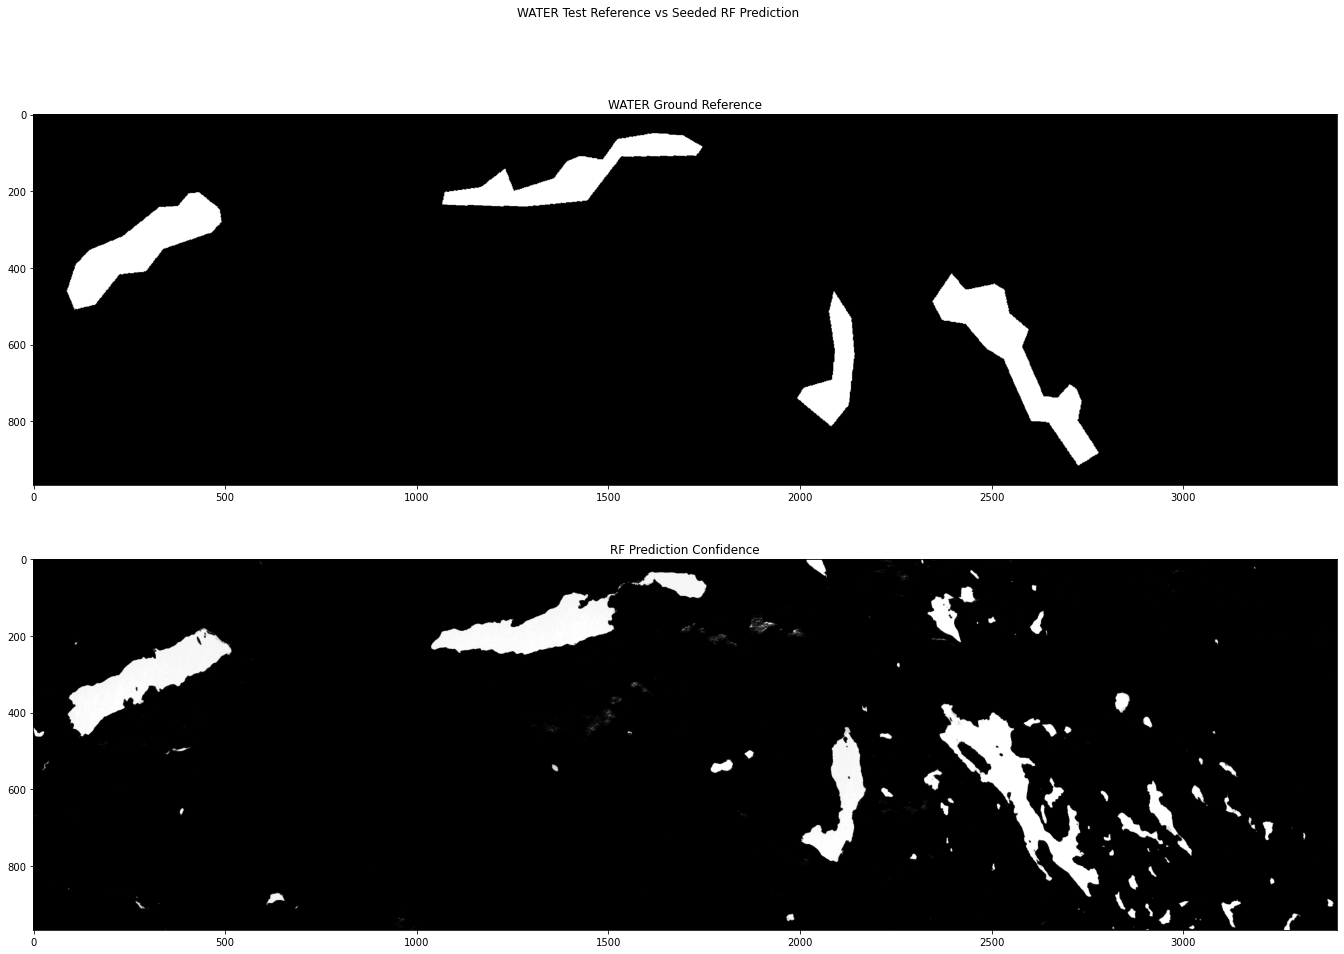

TRUE SAMPLES - 102954
FALSE SAMPLES - 2946051


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.9s finished


TRUE SAMPLES - 18358
FALSE SAMPLES - 2620378


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   46.5s finished


TRUE SAMPLES - 3755
FALSE SAMPLES - 2721226


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   47.2s finished


Skipping fold 4 - thresholds yield length zero


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   11.9s
[Parallel(n_jobs=16)]: Done 750 out of 750 | elapsed:   21.0s finished


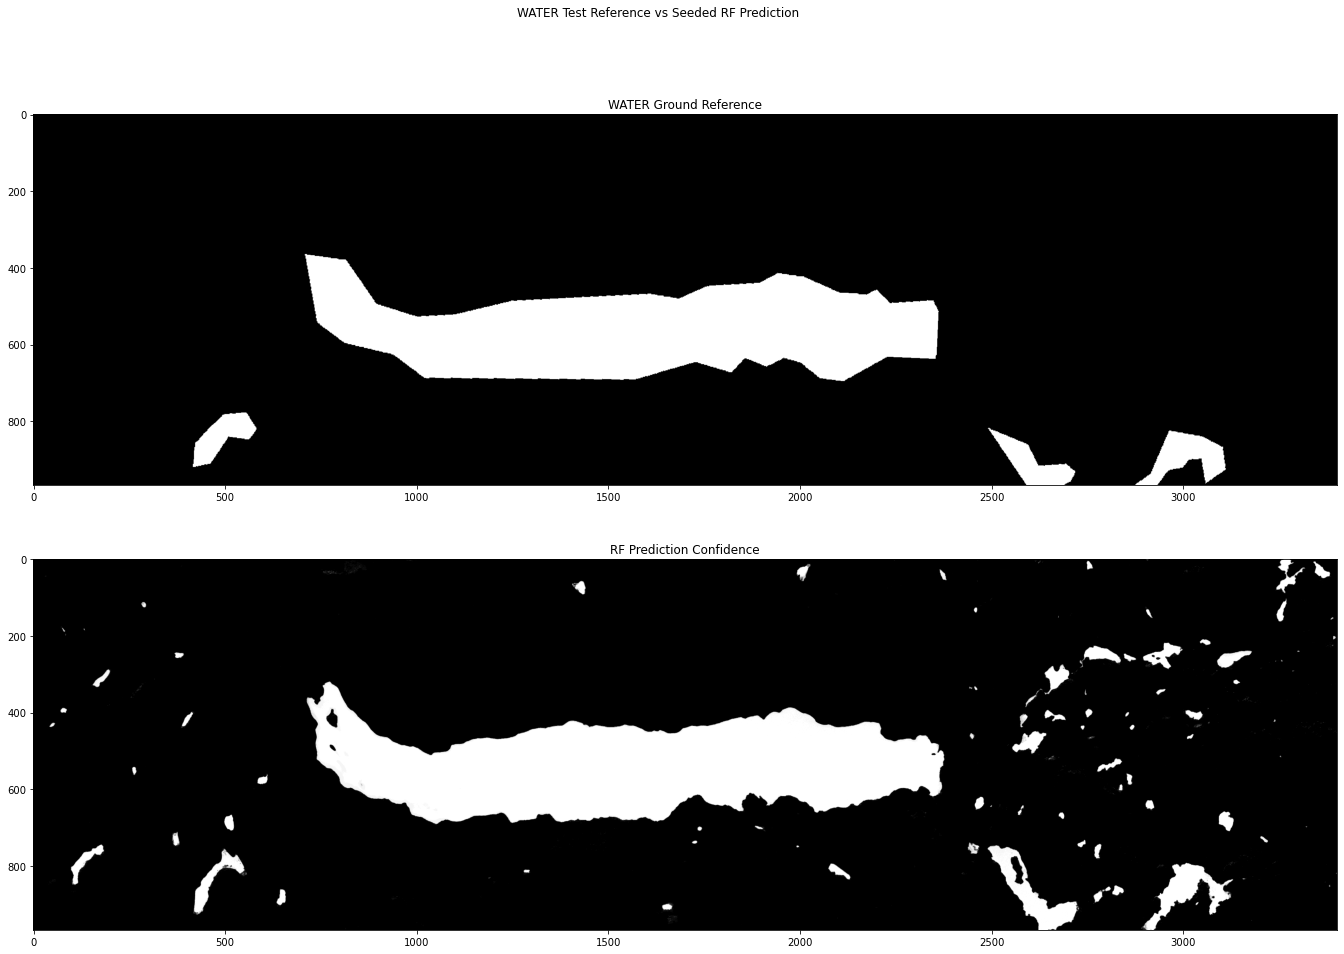

TRUE SAMPLES - 102954
FALSE SAMPLES - 2946051


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.0s finished


TRUE SAMPLES - 275323
FALSE SAMPLES - 2726427


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.0s finished


TRUE SAMPLES - 3755
FALSE SAMPLES - 2721226


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   46.9s finished


Skipping fold 4 - thresholds yield length zero


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   12.0s
[Parallel(n_jobs=16)]: Done 750 out of 750 | elapsed:   21.1s finished


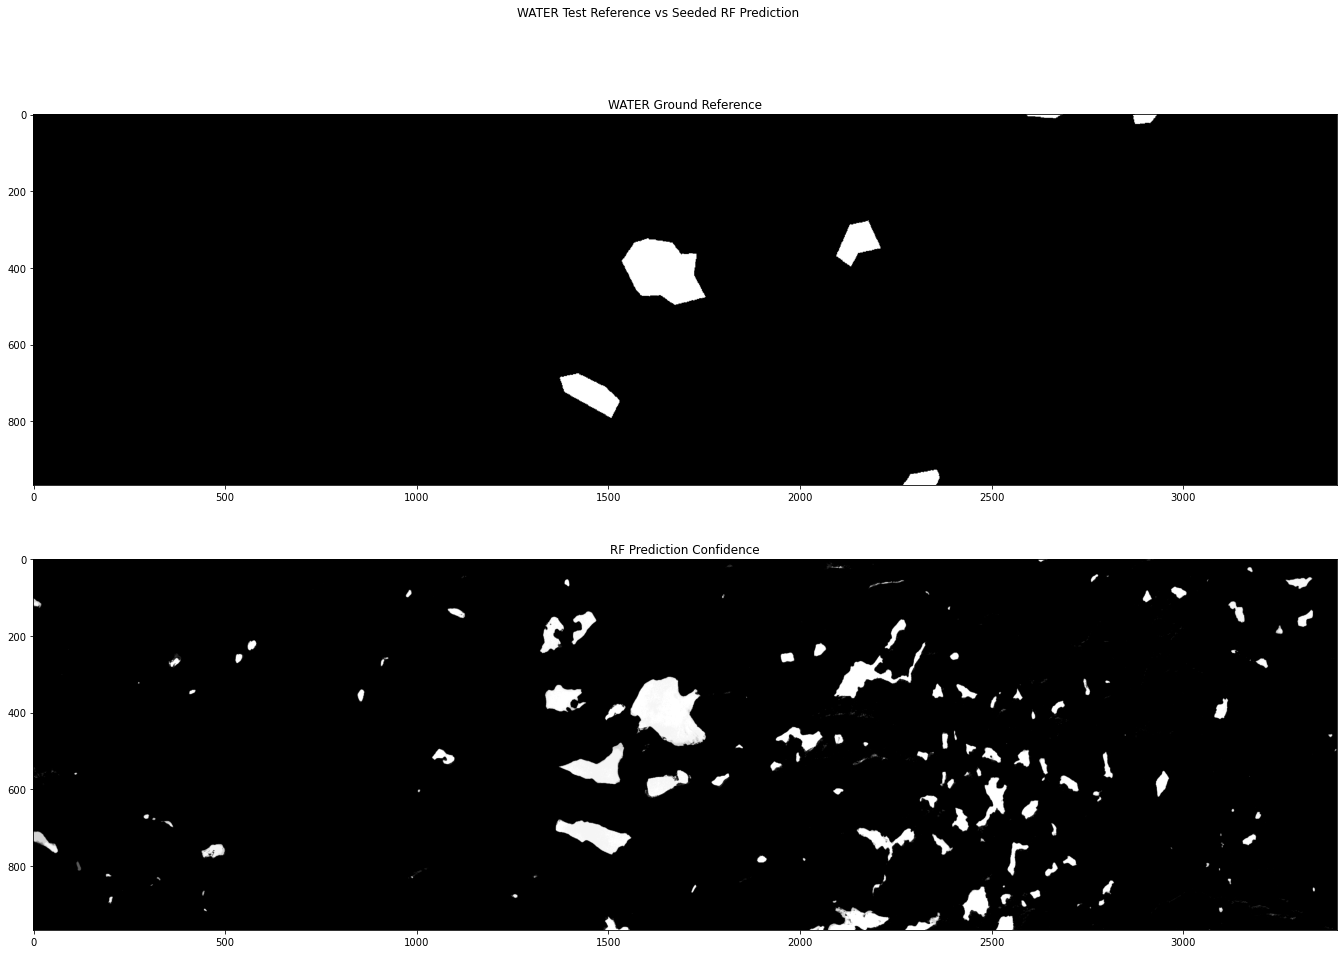

TRUE SAMPLES - 102954
FALSE SAMPLES - 2946051


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.1s finished


TRUE SAMPLES - 275323
FALSE SAMPLES - 2726427


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.0s finished


TRUE SAMPLES - 18358
FALSE SAMPLES - 2620378


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   45.9s finished


Skipping fold 4 - thresholds yield length zero


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    5.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   12.1s
[Parallel(n_jobs=16)]: Done 750 out of 750 | elapsed:   21.2s finished


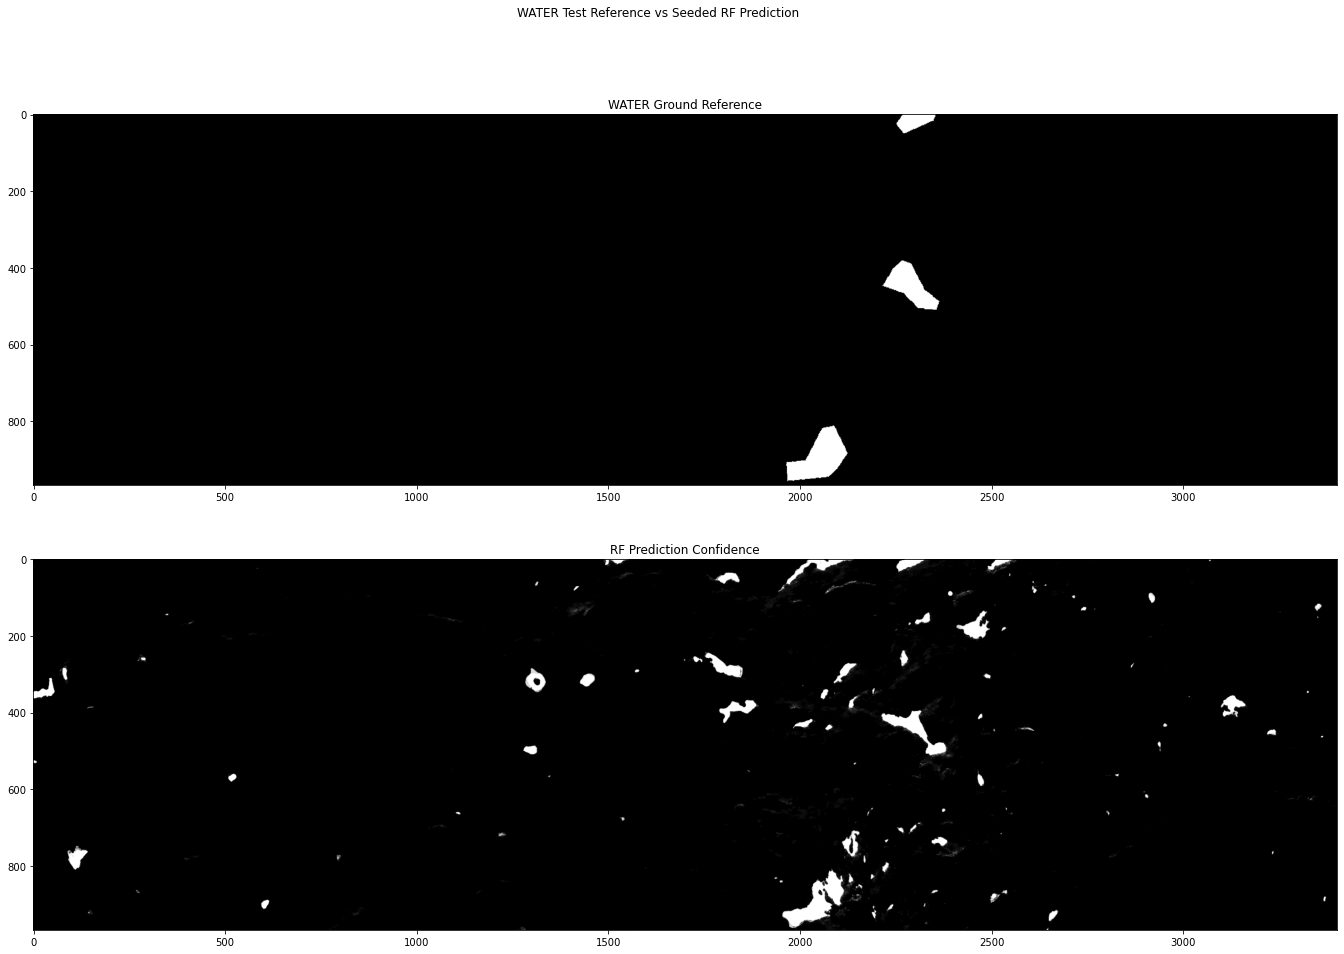

TRUE SAMPLES - 102954
FALSE SAMPLES - 2946051


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   54.6s finished


TRUE SAMPLES - 275323
FALSE SAMPLES - 2726427


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   54.4s finished


TRUE SAMPLES - 18358
FALSE SAMPLES - 2620378


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   46.2s finished


TRUE SAMPLES - 3755
FALSE SAMPLES - 2721226


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   47.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   12.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:   21.8s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:   28.0s finished


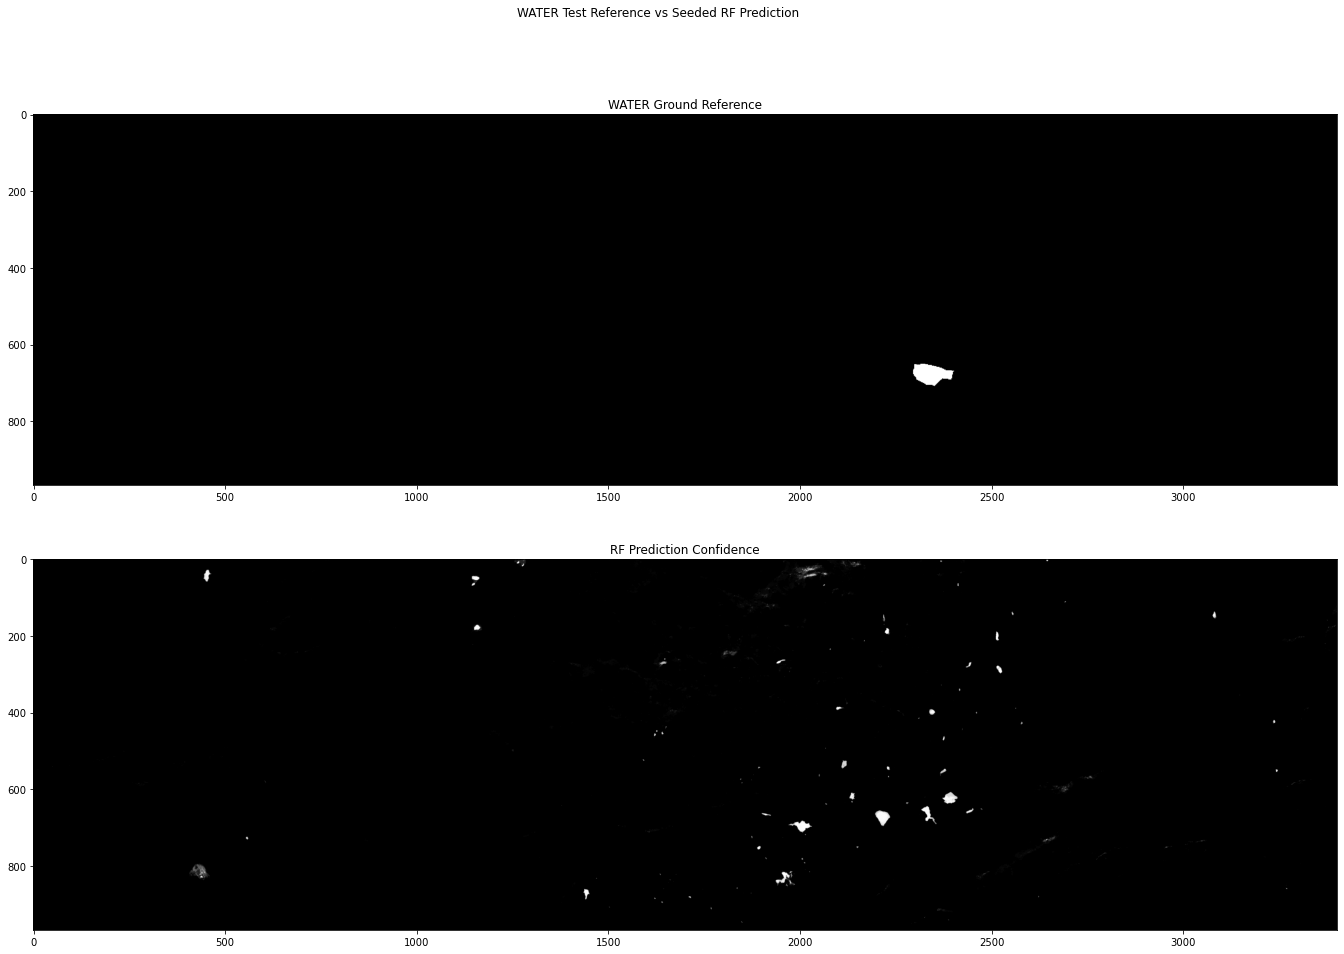

In [9]:
for test_x in range(5):
    params = {
        'n_estimators': n_est,
        'max_depth': 6,
        'max_features': 0.3,
        'verbose': 1,
        'n_jobs': -1,
        'oob_score': True,
        'warm_start': True
    }
    clf = RandomForestClassifier(**params,)
    X_test = X[fold_length * test_x : fold_length * (test_x+1), :]
    y_test = y[test_x * fold_length : (test_x+1) * fold_length].astype(int)
    for train_x in range(5):
        # Training
        if train_x == test_x:
            continue
        X_fold = X[fold_length * train_x : fold_length * (train_x+1), :]
        y_fold = np.load(f'{datadir}/fold_{train_x}/{TYPE.lower()}.npy')
        assert len(X_fold) == len(y_fold)
        true_idx = np.where(y_fold > TRUE_THRESH)
        false_idx = np.where(y_fold < FALSE_THRESH)
        # TODO: SMART THRESHOLDING
#         while True:
#             
            
#             if len(true_idx[0])/len(false_idx[0]) > .5:
#                 # at least half as many 
#                 print("Seeding Criteria Met")
#                 print(f"True Samples - {len(true_idx)}")
#                 print(f"False Samples - {len(false_idx)}")
#                 print(f"{TRUE_THRESH}")
#                 print(f"{FALSE_THRESH}")
#                 print()
#                 break
#             TRUE_THRESH -= .01
#             FALSE_TRHESH += .01
            
        X_true = np.squeeze(X_fold[true_idx, :])
        X_false = np.squeeze(X_fold[false_idx, :])
        y_true = np.ones(len(true_idx[0]))
        y_false = np.zeros(len(false_idx[0]))
        if len(y_true) == 0 or len(y_false) == 0:
            print(f"Skipping fold {train_x} - thresholds yield length zero")
            continue
        else:
            print(f'TRUE SAMPLES - {len(y_true)}')
            print(f'FALSE SAMPLES - {len(y_false)}')
        X_train = np.concatenate((X_true, X_false))
        y_train = np.concatenate((y_true, y_false))
        X_train, y_train = shuffle(X_train, y_train)
        clf.fit(X_train, y_train)
        clf.n_estimators += n_est
        
    # Testing
    pred = clf.predict_proba(X_test)
    pred = pred[:,1].reshape(sub_img_shape)    
    ones = np.ones((y_test.shape))
    f, ax = plt.subplots(2,1, sharey=True, figsize=(30,15))
    f.suptitle(f"{TYPE} Test Reference vs Seeded RF Prediction")
    colormap_y = ax[0].imshow(y_test.reshape(sub_img_shape), cmap='gray', vmin=0, vmax=1)
    ax[0].set_title(f'{TYPE} Ground Reference')
    ax[1].imshow(pred, cmap='gray', vmin=0, vmax=1)
    ax[1].set_title('RF Prediction Confidence')
    plt.savefig(f'{outdir}/{TYPE}_{test_x}_result')
    plt.show()